# 1. Load data

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("./data_final_0817.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data_final_0817.csv'

In [4]:
df

NameError: name 'df' is not defined

In [4]:
#create new DataFrame and only keep 'text' and 'created_at' columns
df = df[['Time','Text', 'Entities','Public Metrics','Union']]

In [5]:
df #new data

,Time,Text,Entities,Public Metrics,Union
0,2020-10-09T21:24:36.000Z,These members of Congress are standing up and ...,"{'urls': [{'start': 110, 'end': 133, 'url': 'h...","{'retweet_count': 3, 'reply_count': 0, 'like_c...",AFGENational
1,2022-06-22T17:38:01.000Z,EPA lab work in Houston is suffering as plans ...,"{'hashtags': [{'start': 84, 'end': 87, 'tag': ...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",AFGENational
2,2022-06-16T19:41:01.000Z,Learn more about the EPA Council's upcoming co...,"{'urls': [{'start': 63, 'end': 86, 'url': 'htt...","{'retweet_count': 1, 'reply_count': 0, 'like_c...",AFGENational
3,2022-06-10T19:14:01.000Z,AFGE EPA members are gearing up for contract n...,"{'hashtags': [{'start': 114, 'end': 117, 'tag'...","{'retweet_count': 2, 'reply_count': 0, 'like_c...",AFGENational
4,2022-04-25T18:05:03.000Z,AFGE EPA leaders are pushing for a clause in t...,"{'hashtags': [{'start': 131, 'end': 134, 'tag'...","{'retweet_count': 2, 'reply_count': 0, 'like_c...",AFGENational
...,...,...,...,...,...
8319,2012-03-06T21:50:04.000Z,100 years before OSHA - these kids were workin...,"{'urls': [{'start': 85, 'end': 105, 'url': 'ht...","{'retweet_count': 1, 'reply_count': 0, 'like_c...",unithere
8320,2012-02-27T21:35:06.000Z,WOO! New Contract Ratified at Consol Energy C...,"{'hashtags': [{'start': 53, 'end': 56, 'tag': ...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",unithere
8321,2022-08-08T21:08:55.000Z,UNITE HERE Statement on Inflation Reduction Ac...,"{'annotations': [{'start': 256, 'end': 269, 'p...","{'retweet_count': 17, 'reply_count': 3, 'like_...",unithere
8322,2022-08-07T20:31:38.000Z,"This historic bill will cut energy costs, inve...","{'urls': [{'start': 163, 'end': 186, 'url': 'h...","{'retweet_count': 11, 'reply_count': 0, 'like_...",UAPipeTrades


In [6]:
df.index

RangeIndex(start=0, stop=8324, step=1)

# (2) Timeline Visualization


In [7]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
%matplotlib inline
import seaborn as sns

In [8]:
df.dtypes

Time              object
Text              object
Entities          object
Public Metrics    object
Union             object
dtype: object

In [9]:
# Convert created_at to time variable, this will allow us to manipulate the data by time.
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-9-02717cf74c5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'])


In [10]:
df.dtypes

Time              datetime64[ns, UTC]
Text                           object
Entities                       object
Public Metrics                 object
Union                          object
dtype: object

In [11]:
#set index
df = df.set_index(['Time'])
df.head(2)

,Text,Entities,Public Metrics,Union
Time,,,,
2020-10-09 21:24:36+00:00,These members of Congress are standing up and ...,"{'urls': [{'start': 110, 'end': 133, 'url': 'h...","{'retweet_count': 3, 'reply_count': 0, 'like_c...",AFGENational
2022-06-22 17:38:01+00:00,EPA lab work in Houston is suffering as plans ...,"{'hashtags': [{'start': 84, 'end': 87, 'tag': ...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",AFGENational


In [12]:
df=df.sort_index(ascending=False)

In [13]:
def convert_to_quarter(df):
    results = {}
    for d in df.iterrows():
        # get the date
        year, month, day = d[0].strftime('%Y-%m-%d').split("-")
        
        # save the new year if not exists
        if year not in results.keys():
            # add the year
            results[year] = {}
            
        # compute the quarter id 
        quarter_id = "Q" + str(int((float(month) - 1) // 3) + 1)
            
        # update the quarter id
        if quarter_id not in results[year].keys():
            results[year][quarter_id] = 1
        else:
            results[year][quarter_id] += 1
            
    return results

def print_info(data):
    # print the info
    for year in data.keys():
        print(f"-------------------   {year}     -------------------")
        for quarter in data[year].keys():
            print(f"   {quarter} - {data[year][quarter]}")

In [14]:
df_quarter = convert_to_quarter(df)

print_info(df_quarter)

-------------------   2022     -------------------
   Q3 - 94
   Q2 - 155
   Q1 - 175
-------------------   2021     -------------------
   Q4 - 261
   Q3 - 301
   Q2 - 270
   Q1 - 199
-------------------   2020     -------------------
   Q4 - 153
   Q3 - 200
   Q2 - 122
   Q1 - 133
-------------------   2019     -------------------
   Q4 - 159
   Q3 - 219
   Q2 - 230
   Q1 - 154
-------------------   2018     -------------------
   Q4 - 339
   Q3 - 426
   Q2 - 190
   Q1 - 176
-------------------   2017     -------------------
   Q4 - 289
   Q3 - 218
   Q2 - 224
   Q1 - 183
-------------------   2016     -------------------
   Q4 - 140
   Q3 - 182
   Q2 - 201
   Q1 - 210
-------------------   2015     -------------------
   Q4 - 178
   Q3 - 219
   Q2 - 165
   Q1 - 191
-------------------   2014     -------------------
   Q4 - 163
   Q3 - 228
   Q2 - 161
   Q1 - 128
-------------------   2013     -------------------
   Q4 - 84
   Q3 - 108
   Q2 - 186
   Q1 - 146
-------------------   20

In [15]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)
#The following line will set the defalt plots to be bigger
plt.rcParams['figure.figsize'] = (15, 5)

In [16]:
def plot_chart(data, configs):
    # set plot font size
    plt.rcParams.update({'font.size': configs['font_size']})
    # get all the labels
    x_labels = []
    y_values = []
    for y in data.keys():
        for q in data[y].keys():
            x_labels.append(q + " " + y)
            y_values.append(data[y][q])
   
    # reverse the order
    x_labels.reverse()
    y_values.reverse()
    
    plt.title(configs['title'])
    plt.xlabel(configs['x_label'])
    plt.ylabel(configs['y_label'])
    if configs['chart_type'] == "line":
        plt.plot(x_labels, y_values, color=configs['color'], 
                 linewidth=configs['linewidth'],
                 marker=configs['marker'],
                 markersize=configs['markersize'],
                 alpha=configs['alpha'])
    else:
        plt.bar(x_labels, y_values, color=configs['color'], alpha=configs['alpha'])
    plt.xticks(rotation=90)
    plt.grid("on")
    plt.show()

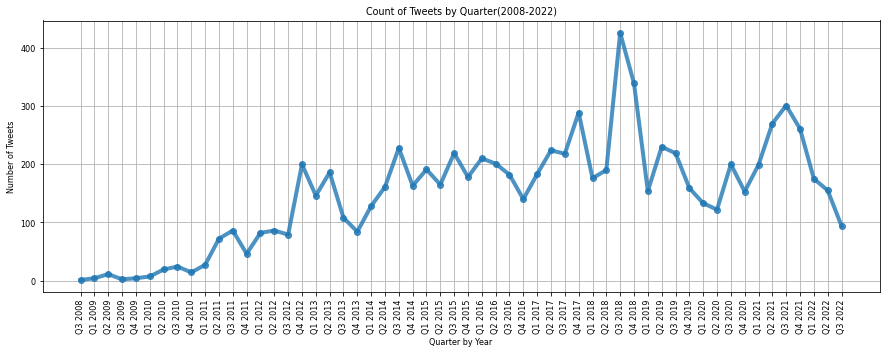

In [17]:
# define the chart configurations
chart_configs = {
    "chart_type": "line",  # line for plotting line chart, bar for bar chart
    
    "title": "Count of Tweets by Quarter(2008-2022)",
    "x_label": "Quarter by Year",
    "y_label": "Number of Tweets",
    "color": "tab:blue",  # options: [tab:red, tab:green, tab:blue, tab:orange, tab:olive]
    "alpha": 0.8,  # change the value to 0 will make the chart transparent
    
    "markersize":6, # for line chart only
    "linewidth": 4, # for line chart only
    "marker": "o",  # for line chart only
    
    "font_size": 8  # big number for bigger font size
}

# usage
plot_chart(df_quarter, chart_configs)

# 2. Data Cleaning

Well, we extracted tweets from twitter, but now we have to extract meaningful insights from the tweet’s data. For that, we have to clean data because it contains lots of URLs, numbers, and user_ids, which get challenging to analyze tweets.

In [18]:
#often, we want to remove stopwords
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
                     'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 
                     'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
                     'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
                     'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
                     'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                     'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 
                     'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
                     'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                     'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
                     'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will',
                     'just', 'dont', 'should', 'aint', 'arent', 'couldn', 'could', 'would', 'much', 'must',
                     'didnt', 'doesnt', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shan',
                     'shouldnt', 'wasnt', 'werent', 'wont', 'wouldnt','rt','mt','amp','mil','ve','don','s','st','pres','req','aft','ua']

In [19]:
 #adopted from catriscode, https://catriscode.com/2021/05/01/tweets-cleaning-with-python/

import numpy as np
import re

def clean_tweet(tweet):
    raw_tweet = str(tweet)
    if type(tweet) == float:
        return ""
    temp = re.sub("'", "", str(tweet)) # to avoid removing contractions in english
    temp = temp.lower()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub(r"www.\S+", "", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    #temp = re.sub("[^a-z0-9]"," ", temp) # this removes all letters including CO2
    temp = re.sub("[^a-z]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    
    if temp is None:
        print (raw_tweet,temp)
        
    return temp

In [20]:
df['Text1'] = df['Text'].apply(clean_tweet)

In [21]:
df

,Text,Entities,Public Metrics,Union,Text1
Time,,,,,
2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...
2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...
2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...
2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...
2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...
...,...,...,...,...,...
2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy
2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...
2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference


In [22]:
df = df.dropna(subset=['Text1'])
df
#empty data with cleaning procedure

,Text,Entities,Public Metrics,Union,Text1
Time,,,,,
2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...
2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...
2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...
2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...
2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...
...,...,...,...,...,...
2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy
2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...
2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference


In [23]:
#`reset_index()`will recreate index column every time we run it on same data 
#`drop = True` paramater won’t create that as column in the dataframe, look at the difference between following two dataset
df = df.reset_index(drop=False) 

In [24]:
df

,Time,Text,Entities,Public Metrics,Union,Text1
0,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...
1,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...
2,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...
3,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...
4,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...
...,...,...,...,...,...,...
8319,2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy
8320,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...
8321,2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference
8322,2009-02-04 18:12:48+00:00,Sierra Club prez says an economy that treats w...,"{'annotations': [{'start': 0, 'end': 10, 'prob...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",UFCW,sierra club prez says economy treats workers b...


In [25]:
df

,Time,Text,Entities,Public Metrics,Union,Text1
0,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...
1,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...
2,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...
3,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...
4,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...
...,...,...,...,...,...,...
8319,2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy
8320,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...
8321,2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference
8322,2009-02-04 18:12:48+00:00,Sierra Club prez says an economy that treats w...,"{'annotations': [{'start': 0, 'end': 10, 'prob...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",UFCW,sierra club prez says economy treats workers b...


In [26]:
df.index

RangeIndex(start=0, stop=8324, step=1)

# 4. Topic Modeling

In [27]:
####Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#define a function that can print out the top words for each topic.

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [28]:
#Vectorize our text using CountVectorizer
#LDA is a probabilistic graphical model (i.e. dealing with probabilities) and only requires raw counts, so a CountVectorizer is used.

print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80,min_df=100,
                                max_features=None,
                                stop_words='english'
                                )

#max_df=0.80, min_df=100,

#max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words."
#For example: max_df = 0.80 means "ignore terms that appear in more than 80% of the documents."
#min_df is used for removing terms that appear too infrequently. 
#For example: min_df = 50 means "ignore terms that appear in less than 50 documents"

tf = tf_vectorizer.fit_transform(df.Text1)

Extracting tf features for LDA...


In [29]:
# The number of topics was decided in a qualitative way as mentioned in the methods section.
n_samples = 1000000 #by default, but want to keep it here
n_top_words = 30
n_topics = 6

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
lda = LatentDirichletAllocation(n_components=n_topics,max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=n_samples,
                                random_state=0)
#fit the model
lda.fit(tf)

Fitting LDA models with tf features, n_samples=1000000 and n_topics=6...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=6, random_state=0,
                          total_samples=1000000)

In [30]:
#print the top words per topic, using the function defined above.

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

#note that we didn't delete repetitive tweets before topic modeling, we assue that if the company retweeting similar stuff, they are strenthening their image regarding that.


Topics in LDA model:

Topic #0:
water clean safe make pipeline like air today america big read crisis schools infrastructure drinking wind americans work need communities thousands nation power project country year right want family american

Topic #1:
workers environment oil gas support work epa communities better families says industry jobs strike thank food year deserve wages unions protect care tell job country want union need member know

Topic #2:
climate change safety health president build public act fight congress pass time better state house hurricanes care want american tell right families healthcare infrastructure plan economy schools support members make

Topic #3:
members hurricane help people working relief need disaster natural students leaders puerto learn school affected families rico disasters lives know union support planet efforts family live join community member like

Topic #4:
jobs energy good union green local create power members future clean economy building

In [31]:
#get the topic distribution array
topic_dist = lda.transform(tf)
print(topic_dist)
topic_dist_df = pd.DataFrame(topic_dist)
topic_dist_df

[[0.43333727 0.03333334 0.23333104 0.23333167 0.03333334 0.03333334]
 [0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.7222222 ]
 [0.29166211 0.04166669 0.29166726 0.29167057 0.04166669 0.04166669]
 ...
 [0.38855745 0.05555556 0.05555556 0.05555556 0.05588681 0.38888905]
 [0.02380953 0.73801749 0.02402115 0.02380953 0.16653277 0.02380953]
 [0.2916624  0.54162481 0.04166668 0.04166668 0.04171275 0.04166668]]


,0,1,2,3,4,5
0,0.433337,0.033333,0.233331,0.233332,0.033333,0.033333
1,0.055556,0.055556,0.055556,0.055556,0.055556,0.722222
2,0.291662,0.041667,0.291667,0.291671,0.041667,0.041667
3,0.055556,0.055556,0.055556,0.722222,0.055556,0.055556
4,0.233162,0.033333,0.633191,0.033333,0.033333,0.033647
...,...,...,...,...,...,...
8319,0.083333,0.083333,0.083333,0.083333,0.583333,0.083333
8320,0.397813,0.027778,0.027778,0.027791,0.324373,0.194467
8321,0.388557,0.055556,0.055556,0.055556,0.055887,0.388889
8322,0.023810,0.738017,0.024021,0.023810,0.166533,0.023810


In [32]:
#since we are considering join, so we should check the index
topic_dist_df.index

RangeIndex(start=0, stop=8324, step=1)

In [33]:
df.index

RangeIndex(start=0, stop=8324, step=1)

In [34]:
df

,Time,Text,Entities,Public Metrics,Union,Text1
0,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...
1,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...
2,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...
3,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...
4,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...
...,...,...,...,...,...,...
8319,2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy
8320,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...
8321,2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference
8322,2009-02-04 18:12:48+00:00,Sierra Club prez says an economy that treats w...,"{'annotations': [{'start': 0, 'end': 10, 'prob...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",UFCW,sierra club prez says economy treats workers b...


In [35]:
df.to_csv("./cleaned.csv")

In [36]:
df_topics = topic_dist_df.join(df)

#drop unnecessary columns

#drop unnecessary columns
#df_topics = df_topics.drop(['text1','text2','text3'],axis=1 )
df_topics.head()

,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1
0,0.433337,0.033333,0.233331,0.233332,0.033333,0.033333,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...
1,0.055556,0.055556,0.055556,0.055556,0.055556,0.722222,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...
2,0.291662,0.041667,0.291667,0.291671,0.041667,0.041667,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...
3,0.055556,0.055556,0.055556,0.722222,0.055556,0.055556,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...
4,0.233162,0.033333,0.633191,0.033333,0.033333,0.033647,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...


In [37]:
nan_num = 0
for idx in df_topics.index:
    tmp_text = str(df_topics['Text'][idx])
    if len(tmp_text) < 4:
        print(idx, tmp_text, df_topics['Text1'][idx])
        nan_num += 1
print(nan_num)

0


In [38]:
# We can now calculate the total number of words aligned with each topic.
# create word count column
df_topics['word_count'] = df_topics['Text1'].apply(lambda x: len(str(x).split()))

#multiple topic weight by word count for each document
df_topics['0_wc'] = df_topics[0] * df_topics['word_count']

####Adopted From: 
#Author: Prof. Laura Nelson

#create a for loop to do this for every topic
topic_columns = range(0, n_topics)
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_topics[col] = df_topics[num] * df_topics['word_count']

df_topics

,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.433337,0.033333,0.233331,0.233332,0.033333,0.033333,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...,28,12.133444,0.933333,6.533269,6.533287,0.933333,0.933333
1,0.055556,0.055556,0.055556,0.055556,0.055556,0.722222,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...,17,0.944445,0.944445,0.944445,0.944445,0.944445,12.277777
2,0.291662,0.041667,0.291667,0.291671,0.041667,0.041667,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...,10,2.916621,0.416667,2.916673,2.916706,0.416667,0.416667
3,0.055556,0.055556,0.055556,0.722222,0.055556,0.055556,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...,17,0.944445,0.944445,0.944445,12.277777,0.944445,0.944445
4,0.233162,0.033333,0.633191,0.033333,0.033333,0.033647,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...,21,4.896394,0.700000,13.297017,0.700000,0.700000,0.706588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,0.083333,0.083333,0.083333,0.083333,0.583333,0.083333,2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy,5,0.416667,0.416667,0.416667,0.416667,2.916667,0.416667
8320,0.397813,0.027778,0.027778,0.027791,0.324373,0.194467,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...,10,3.978133,0.277778,0.277778,0.277907,3.243730,1.944673
8321,0.388557,0.055556,0.055556,0.055556,0.055887,0.388889,2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference,6,2.331345,0.333333,0.333333,0.333333,0.335321,2.333334
8322,0.023810,0.738017,0.024021,0.023810,0.166533,0.023810,2009-02-04 18:12:48+00:00,Sierra Club prez says an economy that treats w...,"{'annotations': [{'start': 0, 'end': 10, 'prob...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",UFCW,sierra club prez says economy treats workers b...,11,0.261905,8.118192,0.264233,0.261905,1.831860,0.261905


In [39]:
import pyLDAvis.sklearn

#visualization can be displayed in the notebook
pyLDAvis.enable_notebook()

#The pyLDAvis offers a nice visualization to view the topics-keywords distribution
p = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne',sort_topics=False)

#adjust width, avoid some overlap in the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

pyLDAvis.display(p)

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


# 5. Tweets by topic distribution and representative texts for each topic

In [40]:
df_topics

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.433337,0.033333,0.233331,0.233332,0.033333,0.033333,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...,28,12.133444,0.933333,6.533269,6.533287,0.933333,0.933333
1,0.055556,0.055556,0.055556,0.055556,0.055556,0.722222,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...,17,0.944445,0.944445,0.944445,0.944445,0.944445,12.277777
2,0.291662,0.041667,0.291667,0.291671,0.041667,0.041667,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...,10,2.916621,0.416667,2.916673,2.916706,0.416667,0.416667
3,0.055556,0.055556,0.055556,0.722222,0.055556,0.055556,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...,17,0.944445,0.944445,0.944445,12.277777,0.944445,0.944445
4,0.233162,0.033333,0.633191,0.033333,0.033333,0.033647,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...,21,4.896394,0.700000,13.297017,0.700000,0.700000,0.706588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,0.083333,0.083333,0.083333,0.083333,0.583333,0.083333,2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy,5,0.416667,0.416667,0.416667,0.416667,2.916667,0.416667
8320,0.397813,0.027778,0.027778,0.027791,0.324373,0.194467,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...,10,3.978133,0.277778,0.277778,0.277907,3.243730,1.944673
8321,0.388557,0.055556,0.055556,0.055556,0.055887,0.388889,2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference,6,2.331345,0.333333,0.333333,0.333333,0.335321,2.333334
8322,0.023810,0.738017,0.024021,0.023810,0.166533,0.023810,2009-02-04 18:12:48+00:00,Sierra Club prez says an economy that treats w...,"{'annotations': [{'start': 0, 'end': 10, 'prob...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",UFCW,sierra club prez says economy treats workers b...,11,0.261905,8.118192,0.264233,0.261905,1.831860,0.261905


# 5.1 representative tweet of Topic 1

In [41]:
df_topics[['Text', 0]].sort_values(by=[0], ascending=False)

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,0
3902,"""We started #OperationAgua because access to s...",0.906928
4062,.@rweingarten was in #PuertoRico today deliver...,0.895797
3366,We're proud to announce that thanks to the tho...,0.880929
3396,Every child deserves access to clean water. Th...,0.880824
90,Everyone in our country should have access to ...,0.880726
...,...,...
1960,SEIU members support students &amp; climate ac...,0.009857
565,Let's get the Build Back Better Act passed. \n...,0.009838
923,Climate justice is racial &amp; economic justi...,0.009804
2415,Our members and working people across the nati...,0.008801


In [42]:
df_topics._get_value(3902,'Text')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'"We started #OperationAgua because access to safe drinking water is a fundamental human right... we continue to distribute thousands of easy-to-use, dependable filters to schools, families and communities across the island." — @mcricker #PuertoRicoSeLevanta #PuertoRico https://t.co/oZCqZmcGqT'

In [43]:
df_topics._get_value(3902,'Union')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'AFTunion'

# 5.2 representative tweet of Topic 2

In [44]:
df_topics[['Text', 1]].sort_values(by=[1], ascending=False)

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,1
2825,". @Tesla workers just want what was promised, ...",0.916113
2905,Buffalo @Tesla was promised $750 mil. in taxpa...,0.907135
2890,Buffalo @Tesla was promised $750 mil. in taxpa...,0.907135
2913,Buffalo @Tesla was promised $750 mil. in taxpa...,0.907135
2912,Buffalo @Tesla was promised $750 mil. in taxpa...,0.907135
...,...,...
1266,President Biden’s plan to Build Back Better wi...,0.009860
923,Climate justice is racial &amp; economic justi...,0.009804
2415,Our members and working people across the nati...,0.008781
2491,Our members and working people across the nati...,0.008781


In [45]:
df_topics._get_value(2825,'Text')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'. @Tesla workers just want what was promised, $750 mil. in taxpayer funding for better jobs - wages that support our families, communities &amp; environment. #WePowerBuffalo https://t.co/a9jVMzSl3J'

In [46]:
df_topics._get_value(2825,'Union')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'steelworkers'

# 5.3 representative tweet of Topic 3

In [47]:
print(df_topics[['Text', 2]].sort_values(by=[2], ascending=False))

                                                   Text         2
1593  Climate change is real.\nClimate change is rea...  0.913069
231   There’s no ambiguity in the UN reports on clim...  0.895784
503   We applaud President Biden and the House Democ...  0.880886
899   The #BuildBackBetter agenda will\n⬇️  lower pr...  0.880870
605   #IBEW Pres. Lonnie Stephenson: "We urge Congre...  0.880867
...                                                 ...       ...
1047  Our tax dollars fund clean energy projects, bu...  0.011262
244   So glad @AFTEVPDeJesus could join @VP and @Sec...  0.011200
885   .@POTUS is right: the Bipartisan Infrastructur...  0.011159
923   Climate justice is racial &amp; economic justi...  0.009925
1149  Andrea is 100% right! We need a clean environm...  0.009284

[8324 rows x 2 columns]


/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
df_topics._get_value(1593,'Text')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Climate change is real.\nClimate change is real.\nClimate change is real.\nClimate change is real.\nClimate change is real.\nClimate change is real.\nClimate change is real.\nClimate change is real.\nClimate change is real.\n\nMake your plan to vote: https://t.co/53AhOgsv4R #VPdebate2020'

In [49]:
df_topics._get_value(1593,'Union')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'SEIU'

# 5.4 representative tweet of Topic 4

In [50]:
print(df_topics[['Text', 3]].sort_values(by=[3], ascending=False))

                                                   Text         3
417   You can help NALC members who have been affect...  0.930544
315   You can help NALC members who have been affect...  0.924228
263   Natural disasters continue to affect NALC memb...  0.924153
578   Natural disasters continue to affect families ...  0.924122
2441  From volunteering w/the NALC #DisasterRelief F...  0.916667
...                                                 ...       ...
212   Climate action that meets the scale of the cri...  0.010425
1266  President Biden’s plan to Build Back Better wi...  0.009812
923   Climate justice is racial &amp; economic justi...  0.009804
1149  Andrea is 100% right! We need a clean environm...  0.009372
1593  Climate change is real.\nClimate change is rea...  0.007946

[8324 rows x 2 columns]


/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df_topics._get_value(417,'Text')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'You can help NALC members who have been affected by the Marshall Fire with a contribution to the NALC Disaster Relief Foundation. One hundred percent of donations from NALC members go directly to assist members affected by natural disasters. Learn more: https://t.co/B4wbRMA8pY https://t.co/88ZHB8GERA'

In [52]:
df_topics._get_value(417,'Union')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'NALC_National'

# 5.5 representative tweet of Topic 5

In [53]:
print(df_topics[['Text', 4]].sort_values(by=[4], ascending=False))

                                                   Text         4
1782  . @JoeBiden ‘s clean-energy plan isn’t just an...  0.916572
684   ICYMI: Expanding EV tax credits for vehicles b...  0.916195
1187  #IBEW Pres.: "The @POTUS' announcement is cons...  0.907270
94    "Modernizing this infrastructure... remind[s] ...  0.907266
488   Jay knows it’s important to tell the Senate to...  0.907263
...                                                 ...       ...
2730  Today, Congress introduced the WATER Act, a bi...  0.011151
923   Climate justice is racial &amp; economic justi...  0.009804
2491  Our members and working people across the nati...  0.008810
2415  Our members and working people across the nati...  0.008810
1593  Climate change is real.\nClimate change is rea...  0.007945

[8324 rows x 2 columns]


/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df_topics._get_value(1782,'Text')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'. @JoeBiden ‘s clean-energy plan isn’t just an energy plan. It’s a jobs plan, creating millions of good construction, utility, manufacturing and telecom jobs. https://t.co/SXSPwkK27Q'

In [55]:
df_topics._get_value(1782,'Union')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'IBEW'

# 5.6 representative tweet of Topic 6

In [56]:
print(df_topics[['Text', 5]].sort_values(by=[5], ascending=False))

                                                   Text         5
923   Climate justice is racial &amp; economic justi...  0.950859
3638  CWAers, led by @ClaudeCummings, attended the C...  0.880952
474   National Miners Day, a day for showing appreci...  0.880851
2796  129 years ago a group of coal miners, mostly i...  0.880840
2344  We stand with miners at #Blackjewel! Coal mine...  0.880823
...                                                 ...       ...
1190  .@POTUS &amp; @VP are delivering on their prom...  0.010449
2273  Working families are unfairly affected by thre...  0.010431
480   ✅60K green school buses so kids can breathe cl...  0.010417
1266  President Biden’s plan to Build Back Better wi...  0.009829
1593  Climate change is real.\nClimate change is rea...  0.007946

[8324 rows x 2 columns]


/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
df_topics._get_value(923,'Text')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Climate justice is racial &amp; economic justice.\nClimate justice is racial &amp; economic justice.\nClimate justice is racial &amp; economic justice.\nClimate justice is racial &amp; economic justice.\n\n#ClimateAction #ClimateChange \nhttps://t.co/W8tR4iRXvx'

In [58]:
df_topics._get_value(923,'Union')

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'SEIU'

# 6. Topic Distribution by Labor Unions

In [59]:
df_topics

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.433337,0.033333,0.233331,0.233332,0.033333,0.033333,2022-08-14 21:02:00+00:00,"Darren Hale of St. Louis, MO Branch 343 recent...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 10, 'reply_count': 4, 'like_...",NALC_National,darren hale louis mo branch recently rescued y...,28,12.133444,0.933333,6.533269,6.533287,0.933333,0.933333
1,0.055556,0.055556,0.055556,0.055556,0.055556,0.722222,2022-08-14 11:00:05+00:00,"On August 14, 1923, when a miner relit their l...","{'urls': [{'start': 223, 'end': 246, 'url': 'h...","{'retweet_count': 19, 'reply_count': 1, 'like_...",MineWorkers,august miner relit lamp fumes ignited causing ...,17,0.944445,0.944445,0.944445,0.944445,0.944445,12.277777
2,0.291662,0.041667,0.291667,0.291671,0.041667,0.041667,2022-08-13 23:05:54+00:00,The #InflationReductionAct has passed the Hous...,"{'annotations': [{'start': 42, 'end': 57, 'pro...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",TheIronworkers,passed house senate way desk millions working ...,10,2.916621,0.416667,2.916673,2.916706,0.416667,0.416667
3,0.055556,0.055556,0.055556,0.722222,0.055556,0.055556,2022-08-13 02:06:20+00:00,Kentucky has been wracked with historic floodi...,"{'urls': [{'start': 213, 'end': 236, 'url': 'h...","{'retweet_count': 21, 'reply_count': 4, 'like_...",Teamsters,kentucky wracked historic flooding mudslides p...,17,0.944445,0.944445,0.944445,12.277777,0.944445,0.944445
4,0.233162,0.033333,0.633191,0.033333,0.033333,0.033647,2022-08-12 22:03:30+00:00,"Earlier today, the U.S. House of Representativ...","{'annotations': [{'start': 19, 'end': 47, 'pro...","{'retweet_count': 1, 'reply_count': 1, 'like_c...",smartunionworks,earlier today u house representatives passed i...,21,4.896394,0.700000,13.297017,0.700000,0.700000,0.706588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,0.083333,0.083333,0.083333,0.083333,0.583333,0.083333,2009-03-23 14:09:06+00:00,Minnesota Electricians Harness Renewable Energ...,"{'annotations': [{'start': 0, 'end': 8, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,minnesota electricians harness renewable energy,5,0.416667,0.416667,0.416667,0.416667,2.916667,0.416667
8320,0.397813,0.027778,0.027778,0.027791,0.324373,0.194467,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...,10,3.978133,0.277778,0.277778,0.277907,3.243730,1.944673
8321,0.388557,0.055556,0.055556,0.055556,0.055887,0.388889,2009-02-23 13:15:25+00:00,Check Out Video from Clean Coal Press Conferen...,"{'annotations': [{'start': 21, 'end': 47, 'pro...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",IBEW,check video clean coal press conference,6,2.331345,0.333333,0.333333,0.333333,0.335321,2.333334
8322,0.023810,0.738017,0.024021,0.023810,0.166533,0.023810,2009-02-04 18:12:48+00:00,Sierra Club prez says an economy that treats w...,"{'annotations': [{'start': 0, 'end': 10, 'prob...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",UFCW,sierra club prez says economy treats workers b...,11,0.261905,8.118192,0.264233,0.261905,1.831860,0.261905


In [60]:
df_NEAToday=df_topics.loc[(df_topics['Union'] == 'NEAToday')]
df_NEAToday                 

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
81,0.020833,0.020833,0.270838,0.439636,0.226889,0.020970,2022-07-12 22:48:02+00:00,Electric school buses are good for student hea...,"{'urls': [{'start': 124, 'end': 147, 'url': 'h...","{'retweet_count': 7, 'reply_count': 2, 'like_c...",NEAToday,electric school buses good student health heal...,12,0.250000,0.250000,3.250057,5.275631,2.722671,0.251641
146,0.055556,0.055556,0.722137,0.055556,0.055556,0.055641,2022-05-20 00:10:00+00:00,"So far, education advocates have not had a cle...","{'urls': [{'start': 109, 'end': 132, 'url': 'h...","{'retweet_count': 3, 'reply_count': 1, 'like_c...",NEAToday,far education advocates clear role addressing ...,10,0.555556,0.555556,7.221366,0.555556,0.555556,0.556412
190,0.027778,0.027778,0.027778,0.194438,0.527692,0.194536,2022-04-22 19:46:02+00:00,One way to honor #EarthDay: Introduce your stu...,"{'hashtags': [{'start': 17, 'end': 26, 'tag': ...","{'retweet_count': 15, 'reply_count': 2, 'like_...",NEAToday,one way honor introduce students girls green w...,17,0.472222,0.472222,0.472222,3.305448,8.970770,3.307115
226,0.041667,0.042006,0.291294,0.541561,0.041779,0.041694,2022-04-17 22:45:00+00:00,🌍 #EarthDay is Friday! Check out these books t...,"{'hashtags': [{'start': 2, 'end': 11, 'tag': '...","{'retweet_count': 9, 'reply_count': 0, 'like_c...",NEAToday,friday check books help teach inspire kids car...,12,0.500000,0.504069,3.495522,6.498726,0.501349,0.500333
238,0.023876,0.023810,0.420683,0.023810,0.023810,0.484012,2022-04-10 23:08:00+00:00,"With Earth Day right around the corner, how wi...","{'annotations': [{'start': 5, 'end': 13, 'prob...","{'retweet_count': 10, 'reply_count': 5, 'like_...",NEAToday,earth day right around corner teaching climate...,10,0.238759,0.238095,4.206833,0.238095,0.238095,4.840122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,0.055556,0.055556,0.055556,0.388886,0.388891,0.055556,2011-08-01 14:16:58+00:00,Win a green makeover for your school. Find out...,"{'urls': [{'start': 54, 'end': 73, 'url': 'htt...","{'retweet_count': 9, 'reply_count': 0, 'like_c...",NEAToday,win green makeover school find,5,0.277778,0.277778,0.277778,1.944432,1.944456,0.277778
8166,0.041667,0.291671,0.041667,0.041667,0.291662,0.291667,2011-06-01 17:57:25+00:00,"6/5 is World Environment Day. Info, resources ...","{'annotations': [{'start': 7, 'end': 27, 'prob...","{'retweet_count': 2, 'reply_count': 0, 'like_c...",NEAToday,world environment day info resources,5,0.208333,1.458356,0.208333,0.208333,1.458309,1.458335
8186,0.055556,0.055556,0.055556,0.388512,0.055925,0.388897,2011-05-12 15:58:46+00:00,Deadline 5/31 for Captain Planet Foundation Gr...,"{'annotations': [{'start': 18, 'end': 49, 'pro...","{'retweet_count': 1, 'reply_count': 0, 'like_c...",NEAToday,deadline captain planet foundation grants envi...,7,0.388889,0.388889,0.388889,2.719582,0.391473,2.722278
8198,0.027778,0.418922,0.028243,0.194438,0.028033,0.302586,2011-04-22 13:55:46+00:00,It's Earth Day! Tell us what your school is do...,"{'hashtags': [{'start': 87, 'end': 100, 'tag':...","{'retweet_count': 3, 'reply_count': 0, 'like_c...",NEAToday,earth day tell us school protect environment use,8,0.222223,3.351374,0.225943,1.555506,0.224264,2.420691


In [61]:
df_NEAToday.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.145462,0.076065,0.180054,0.250924,0.122271,0.225224,12.661765,1.964676,0.795219,2.458209,3.468359,1.508124,2.467177
std,0.183030,0.090747,0.204222,0.237109,0.135689,0.211774,6.218917,3.213641,0.995407,3.248785,4.437690,1.984417,2.367965
min,0.011117,0.011118,0.018519,0.017014,0.018663,0.018519,4.000000,0.208333,0.222250,0.208333,0.208333,0.224264,0.251641
25%,0.031980,0.027778,0.041667,0.055556,0.033333,0.041667,7.750000,0.387028,0.352095,0.388889,0.500000,0.388913,0.513755
50%,0.055556,0.041675,0.069489,0.175374,0.055556,0.189160,10.500000,0.542252,0.500000,0.616668,1.904365,0.569445,1.755878
75%,0.185423,0.083333,0.291386,0.388886,0.194124,0.388886,17.250000,2.336488,0.644047,3.527670,4.637622,1.898832,3.885323
max,0.790931,0.433338,0.832761,0.880944,0.582465,0.791033,27.000000,19.909022,5.486410,12.909286,23.785475,9.793055,11.525712


In [62]:
df_SEIU=df_topics.loc[(df_topics['Union'] == 'SEIU')]
df_SEIU

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
9,0.016782,0.436118,0.197103,0.216670,0.016667,0.116661,2022-08-11 17:26:51+00:00,"Working people aren‚Äôt asking for the moon, w...","{'hashtags': [{'start': 163, 'end': 167, 'tag'...","{'retweet_count': 20, 'reply_count': 2, 'like_...",SEIU,working people aren t asking moon want workpla...,31,0.520235,13.519649,6.110179,6.716762,0.516672,3.616503
18,0.388892,0.055556,0.388308,0.055556,0.055740,0.055948,2022-08-08 20:50:02+00:00,ICYMI: Senate Democrats just passed a bill tha...,"{'hashtags': [{'start': 177, 'end': 199, 'tag'...","{'retweet_count': 21, 'reply_count': 3, 'like_...",SEIU,icymi senate democrats passed bill lowers heal...,18,7.000059,1.000001,6.989544,1.000001,1.003327,1.007068
30,0.023953,0.614010,0.024096,0.024218,0.023811,0.289911,2022-08-07 02:07:42+00:00,As Senate makes progress toward the #Inflation...,"{'hashtags': [{'start': 36, 'end': 58, 'tag': ...","{'retweet_count': 24, 'reply_count': 1, 'like_...",SEIU,senate makes progress toward continue demand c...,15,0.359300,9.210153,0.361445,0.363271,0.357168,4.348663
59,0.015654,0.161931,0.269282,0.522772,0.015152,0.015209,2022-07-27 14:41:22+00:00,We need leaders who will make it easier for ca...,"{'hashtags': [{'start': 228, 'end': 244, 'tag'...","{'retweet_count': 2, 'reply_count': 0, 'like_c...",SEIU,need leaders make easier caregivers come toget...,22,0.344381,3.562475,5.924206,11.500990,0.333341,0.334606
79,0.055582,0.389371,0.388021,0.055576,0.055822,0.055627,2022-07-14 16:37:58+00:00,"In the first 3 months of 2022, the top 5 oil c...","{'urls': [{'start': 251, 'end': 274, 'url': 'h...","{'retweet_count': 26, 'reply_count': 2, 'like_...",SEIU,first months top oil companies brought billion...,13,0.722561,5.061828,5.044278,0.722487,0.725690,0.723156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,0.055556,0.055556,0.388887,0.055556,0.388891,0.055556,2011-02-21 16:39:04+00:00,Walker's bill allows him to sell state energy ...,"{'mentions': [{'start': 108, 'end': 124, 'user...","{'retweet_count': 8, 'reply_count': 0, 'like_c...",SEIU,walkers bill allows sell state energy assets b...,9,0.500000,0.500000,3.499981,0.500000,3.500018,0.500000
8259,0.581838,0.083333,0.083837,0.083333,0.084325,0.083333,2010-09-13 20:26:03+00:00,The United States' unsustainable infrastructur...,"{'annotations': [{'start': 4, 'end': 16, 'prob...","{'retweet_count': 5, 'reply_count': 0, 'like_c...",SEIU,united states unsustainable infrastructure def...,5,2.909190,0.416667,0.419187,0.416667,0.421623,0.416667
8308,0.027951,0.027788,0.027797,0.027778,0.860908,0.027778,2009-06-29 20:24:39+00:00,"SEIU continues supporting green jobs, clean en...","{'annotations': [{'start': 0, 'end': 3, 'proba...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,seiu continues supporting green jobs clean ene...,8,0.223606,0.222307,0.222378,0.222222,6.887264,0.222222
8320,0.397813,0.027778,0.027778,0.027791,0.324373,0.194467,2009-02-23 15:51:55+00:00,RT @SEIU_AndyStern: At National Clean Energy P...,"{'mentions': [{'start': 3, 'end': 18, 'usernam...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",SEIU,national clean energy project breakfast lots p...,10,3.978133,0.277778,0.277778,0.277907,3.243730,1.944673


In [63]:
df_SEIU.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,0.130798,0.117716,0.229278,0.175427,0.155209,0.191573,15.344130,1.939708,1.675467,3.600036,2.755977,2.477868,2.895073
std,0.184205,0.151698,0.200813,0.190524,0.188059,0.215102,6.181844,2.917627,2.344979,3.530684,3.357958,3.265102,3.552930
min,0.008801,0.007937,0.009284,0.007946,0.007945,0.007946,3.000000,0.148681,0.148853,0.166667,0.151176,0.166667,0.166667
25%,0.020850,0.020833,0.041667,0.027943,0.027806,0.027808,10.000000,0.304192,0.305557,0.444445,0.349382,0.351814,0.354509
50%,0.033525,0.041667,0.194446,0.083333,0.055556,0.083333,15.000000,0.433333,0.437500,2.912186,0.779639,0.583335,0.754097
75%,0.167549,0.170459,0.353342,0.291474,0.234561,0.319434,21.000000,2.909190,2.666667,5.782552,4.332991,3.370795,4.362301
max,0.880726,0.833255,0.913069,0.906999,0.880828,0.950859,31.000000,15.764002,17.723914,27.392071,22.674984,17.742510,19.017181


In [64]:
df_AFSCME=df_topics.loc[(df_topics['Union'] == 'AFSCME')]
df_AFSCME.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,0.244495,0.149573,0.193462,0.187879,0.101403,0.123189,14.538168,3.455045,1.833121,3.425754,2.547334,1.564246,1.712668
std,0.228656,0.182582,0.210832,0.233289,0.138315,0.157189,7.453847,4.107281,2.102734,4.697021,3.644839,2.594310,2.523591
min,0.013913,0.012999,0.015152,0.012878,0.012904,0.012863,4.000000,0.233731,0.222222,0.222222,0.250000,0.222222,0.222222
25%,0.035597,0.033333,0.041667,0.033333,0.027804,0.028028,8.000000,0.444445,0.388889,0.388889,0.416667,0.367412,0.366786
50%,0.166667,0.055556,0.083333,0.055556,0.041945,0.055556,11.000000,1.805548,0.666667,0.683334,0.642535,0.500000,0.533527
75%,0.388895,0.214808,0.337795,0.310566,0.083333,0.166657,22.000000,4.962277,2.916707,4.513481,3.256984,0.901509,2.412900
max,0.860686,0.791296,0.880870,0.907320,0.860530,0.816283,33.000000,18.935085,10.154029,22.902614,19.053723,15.183074,17.141949


In [65]:
df_Teamsters=df_topics.loc[(df_topics['Union'] == 'Teamsters')]
df_Teamsters.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,0.187655,0.188873,0.143902,0.133927,0.177907,0.167736,11.443914,2.050037,2.159409,1.584329,1.463320,2.217592,1.969228
std,0.205018,0.195000,0.177187,0.172562,0.191965,0.190300,6.277748,2.543439,2.686553,2.173951,2.159208,3.154081,2.893562
min,0.015152,0.013011,0.015152,0.010451,0.015241,0.010481,2.000000,0.166667,0.166730,0.166667,0.166667,0.166674,0.166667
25%,0.041667,0.041683,0.041667,0.041667,0.041741,0.041667,7.000000,0.416667,0.416667,0.388889,0.388889,0.416667,0.389488
50%,0.083333,0.083333,0.083333,0.055556,0.083333,0.083333,9.000000,0.833333,0.805556,0.612386,0.583333,0.750000,0.666667
75%,0.288502,0.291666,0.166667,0.166667,0.269657,0.220625,13.000000,2.931172,3.274608,1.500000,1.166667,2.893780,2.576482
max,0.860904,0.832776,0.861094,0.861093,0.860702,0.833286,32.000000,19.599779,17.714339,12.456868,15.303851,19.784472,21.434939


In [66]:
df_UFCW=df_topics.loc[(df_topics['Union'] == 'UFCW')]
df_UFCW.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.137383,0.195560,0.130639,0.183311,0.163749,0.189357,13.381295,1.747726,2.687178,1.887164,2.546742,2.118185,2.394300
std,0.173658,0.192306,0.152567,0.214253,0.178390,0.218648,6.598634,2.648875,2.975735,2.878103,3.492690,2.641056,3.167923
min,0.011443,0.015270,0.011321,0.013952,0.011193,0.013964,3.000000,0.187659,0.208333,0.187500,0.187500,0.208333,0.187500
25%,0.033333,0.041877,0.033333,0.041667,0.041667,0.033333,8.000000,0.371359,0.418839,0.371761,0.416936,0.418029,0.400000
50%,0.055556,0.083333,0.055556,0.083333,0.083333,0.083333,12.000000,0.541667,0.833334,0.555560,0.666667,0.645202,0.613135
75%,0.166667,0.291662,0.166667,0.291067,0.260177,0.314600,19.000000,2.478645,4.094333,2.102629,3.313252,3.437753,3.555555
max,0.722014,0.738017,0.633339,0.895710,0.791179,0.832881,27.000000,16.032099,14.428418,13.875676,20.601334,17.601901,15.655390


In [67]:
df_AFTunion=df_topics.loc[(df_topics['Union'] == 'AFTunion')]
df_AFTunion.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,0.210663,0.098209,0.211176,0.212221,0.136168,0.131564,13.711353,2.906555,1.265883,2.920780,3.008124,1.879417,1.730593
std,0.223425,0.128590,0.226414,0.211777,0.176500,0.175167,5.821199,3.523316,1.809180,3.502530,3.428876,2.730345,2.543722
min,0.011928,0.009860,0.011200,0.009812,0.011151,0.009829,2.000000,0.111113,0.111111,0.111111,0.111111,0.111111,0.111282
25%,0.033735,0.027778,0.033333,0.041667,0.027993,0.027778,9.000000,0.416667,0.351407,0.401440,0.416667,0.373928,0.361109
50%,0.083333,0.041667,0.083333,0.129626,0.041964,0.041731,13.000000,0.835761,0.476191,0.833333,1.666667,0.527782,0.500000
75%,0.361060,0.083333,0.382797,0.355598,0.177385,0.166667,18.000000,4.642673,1.000000,4.708010,4.657702,2.612993,2.239416
max,0.906928,0.722222,0.880509,0.880495,0.895747,0.833333,29.000000,18.930906,16.415926,17.915375,18.560606,17.723186,16.611111


In [68]:
df_steelworkers=df_topics.loc[(df_topics['Union'] == 'steelworkers')]
df_steelworkers.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,0.108981,0.356450,0.163680,0.115083,0.156683,0.099123,12.486906,1.399617,4.582016,2.106959,1.318739,1.944706,1.134868
std,0.161614,0.280668,0.183048,0.172869,0.198603,0.143805,4.722963,2.535170,4.186585,2.724467,2.052046,2.657273,1.770177
min,0.013912,0.015160,0.013900,0.013889,0.014009,0.013889,2.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
25%,0.033333,0.055556,0.033333,0.027799,0.033333,0.027778,9.000000,0.333336,0.592253,0.333335,0.305556,0.334178,0.305636
50%,0.041721,0.314364,0.055556,0.041667,0.055556,0.041667,12.000000,0.533333,3.550528,0.611111,0.501779,0.584321,0.500000
75%,0.083333,0.578456,0.291662,0.083333,0.285765,0.083333,16.000000,0.833333,8.233332,3.499897,0.833333,2.887281,0.750000
max,0.880681,0.916113,0.833222,0.895407,0.861090,0.832841,29.000000,20.255668,20.653362,19.109591,18.803549,14.238589,14.566739


In [69]:
df_IBEW=df_topics.loc[(df_topics['Union'] == 'IBEW')]
df_IBEW.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,0.123100,0.138717,0.119389,0.113924,0.356601,0.148269,9.336315,1.157700,1.175487,1.123250,1.001316,3.504390,1.374172
std,0.151452,0.161483,0.149294,0.137289,0.273558,0.166597,4.606131,1.704899,1.488046,1.750967,1.440627,3.450872,1.979963
min,0.015152,0.011911,0.014056,0.011909,0.023810,0.013940,1.000000,0.133950,0.166667,0.134562,0.133466,0.166667,0.133383
25%,0.041667,0.041667,0.041667,0.037968,0.083333,0.041667,6.000000,0.333333,0.333507,0.333333,0.333333,0.557987,0.333334
50%,0.055676,0.055614,0.055556,0.055556,0.311353,0.083333,8.000000,0.461186,0.500000,0.446092,0.458333,2.707671,0.500000
75%,0.166667,0.166667,0.128329,0.113029,0.583333,0.166667,11.000000,0.833333,1.250001,0.833333,0.833333,5.416223,1.579851
max,0.791109,0.791635,0.880867,0.790655,0.916572,0.790781,29.000000,12.211396,9.807823,13.317801,10.833391,18.332953,17.708551


In [70]:
df_LIUNA=df_topics.loc[(df_topics['Union'] == 'LIUNA')]
df_LIUNA.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,0.223558,0.148768,0.126611,0.114415,0.240736,0.145912,7.984321,1.849593,1.136032,1.018398,0.859312,1.962880,1.158107
std,0.217894,0.162256,0.141542,0.135438,0.239378,0.158628,3.936917,2.311072,1.456382,1.523620,1.262543,2.385281,1.528700
min,0.016715,0.016671,0.016667,0.016667,0.016760,0.016667,1.000000,0.083333,0.083333,0.083333,0.083333,0.083365,0.083333
25%,0.055556,0.042383,0.041667,0.041667,0.055560,0.041754,5.000000,0.388889,0.333333,0.333333,0.305556,0.416667,0.333333
50%,0.106912,0.083333,0.083333,0.055628,0.084325,0.083333,7.000000,0.666667,0.500000,0.500000,0.444445,0.666667,0.500000
75%,0.388770,0.166667,0.166667,0.083842,0.388887,0.166667,10.000000,2.742354,1.166667,0.833333,0.666667,3.107038,1.000000
max,0.833309,0.832728,0.791626,0.832526,0.895464,0.790591,26.000000,18.332800,13.270150,13.180221,15.411832,15.845723,10.010397


In [71]:
df_MachinistsUnion=df_topics.loc[(df_topics['Union'] == 'MachinistsUnion')]
df_MachinistsUnion.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.132683,0.130930,0.128088,0.191870,0.215979,0.200450,11.469799,1.543334,1.374302,1.545519,2.329343,2.700161,1.977141
std,0.158806,0.154107,0.173251,0.253322,0.225394,0.228617,5.490233,2.299746,1.830746,2.433559,3.667955,3.549995,2.438886
min,0.016743,0.016667,0.016667,0.010441,0.016669,0.010475,2.000000,0.139042,0.140594,0.166667,0.166667,0.139462,0.139032
25%,0.041667,0.041667,0.041667,0.041739,0.041981,0.041667,7.000000,0.388889,0.400267,0.366667,0.390170,0.391708,0.400000
50%,0.055556,0.055614,0.055556,0.083333,0.083333,0.083333,10.000000,0.600002,0.666667,0.555556,0.666667,0.833333,0.777778
75%,0.166667,0.166667,0.083333,0.195628,0.388755,0.324458,14.000000,1.166667,1.250000,0.973561,2.333333,4.513197,2.799941
max,0.721684,0.764492,0.833200,0.895798,0.833309,0.832733,29.000000,14.121267,12.996363,14.554518,19.986046,18.191766,11.962900


In [72]:
df_UAW=df_topics.loc[(df_topics['Union'] == 'UAW')]
df_UAW.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.134528,0.155628,0.168583,0.123629,0.236701,0.180931,13.309013,1.665666,2.021116,2.279403,1.452138,3.552472,2.338217
std,0.161637,0.155603,0.179743,0.164997,0.248321,0.184582,6.262144,2.148560,2.468102,2.708087,2.025563,4.799514,2.714421
min,0.011911,0.012012,0.012861,0.011932,0.016668,0.012122,2.000000,0.205508,0.208333,0.208333,0.203704,0.208333,0.203984
25%,0.033333,0.041667,0.041667,0.033333,0.041800,0.041667,9.000000,0.408534,0.435583,0.433334,0.400000,0.444444,0.433333
50%,0.055556,0.083333,0.083333,0.055556,0.083733,0.083333,12.000000,0.611113,0.834509,0.833334,0.583333,1.000000,0.833334
75%,0.166667,0.233334,0.232791,0.166667,0.395519,0.291660,16.000000,1.944448,2.914088,3.677843,1.333333,5.052675,3.500037
max,0.791667,0.722161,0.833310,0.861062,0.916195,0.791484,32.000000,11.371854,16.074278,14.730306,11.809444,26.665064,13.193776


In [73]:
df_CWAUnion=df_topics.loc[(df_topics['Union'] == 'CWAUnion')]
df_CWAUnion.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.106634,0.163969,0.163733,0.146983,0.209134,0.209547,15.121528,1.548142,2.338089,2.784144,2.142414,3.252692,3.056047
std,0.134015,0.171466,0.186054,0.184891,0.226420,0.217358,6.912783,2.174869,2.612103,3.836880,2.915653,4.260642,3.687455
min,0.009838,0.013013,0.016667,0.012821,0.012821,0.014115,2.000000,0.166667,0.166667,0.166667,0.169641,0.167774,0.166667
25%,0.028024,0.033494,0.039741,0.033333,0.033501,0.033382,10.000000,0.408009,0.500000,0.458334,0.434188,0.466667,0.500000
50%,0.041809,0.083333,0.055556,0.055556,0.083333,0.083333,13.000000,0.595275,0.913618,0.750000,0.666667,0.916667,1.000000
75%,0.117578,0.242052,0.233343,0.188022,0.362240,0.367842,21.000000,1.333333,3.767131,3.967750,2.916567,4.430652,4.816494
max,0.693695,0.790593,0.880886,0.861047,0.880540,0.880952,32.000000,14.749123,16.598578,21.775810,14.624967,22.013488,21.142857


In [74]:
df_UAPipeTrades=df_topics.loc[(df_topics['Union'] == 'UAPipeTrades')]
df_UAPipeTrades.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.228300,0.104656,0.115621,0.142740,0.297630,0.111052,15.930348,3.446948,1.556277,1.679370,2.264524,5.301643,1.681587
std,0.223046,0.128495,0.143783,0.184094,0.255497,0.138332,6.505776,3.796603,2.075027,2.069840,3.474712,5.525418,2.267324
min,0.013976,0.011114,0.011159,0.011234,0.018541,0.011916,2.000000,0.214481,0.166667,0.166667,0.166667,0.166667,0.166667
25%,0.041667,0.027788,0.027778,0.033333,0.055556,0.027879,10.000000,0.533334,0.433333,0.429163,0.433334,0.625018,0.428698
50%,0.129621,0.055556,0.055556,0.055556,0.286163,0.055556,15.000000,1.333333,0.644429,0.722222,0.723426,3.499982,0.694445
75%,0.388891,0.109679,0.129616,0.166667,0.496512,0.116715,22.000000,5.541562,1.500008,2.166667,2.720457,8.702613,1.943314
max,0.722222,0.721838,0.646139,0.860241,0.907266,0.722165,28.000000,16.623032,14.040608,10.984363,21.506015,22.681638,12.998975


In [75]:
df_NALC_National=df_topics.loc[(df_topics['Union'] == 'NALC_National')]
df_NALC_National.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.113414,0.142798,0.124109,0.303499,0.130694,0.185485,17.777778,1.968858,2.593859,2.143318,5.707909,2.066234,3.297600
std,0.146823,0.171824,0.140733,0.316329,0.182348,0.213124,6.949047,2.882987,3.643224,2.733165,6.672878,3.044825,4.322667
min,0.013889,0.012839,0.012829,0.016699,0.012833,0.012938,4.000000,0.296559,0.291667,0.291667,0.291667,0.296481,0.291667
25%,0.033333,0.033333,0.033333,0.055556,0.027921,0.033333,11.500000,0.500000,0.500000,0.500000,0.789803,0.474889,0.500000
50%,0.055556,0.083333,0.056274,0.083333,0.055556,0.083333,20.000000,0.833333,0.888889,0.888889,1.916667,0.750020,0.916668
75%,0.083488,0.194446,0.166667,0.583333,0.083333,0.300305,24.000000,1.916667,3.233991,2.444137,9.329561,1.916667,4.750000
max,0.721625,0.747168,0.722222,0.930544,0.791667,0.833318,33.000000,16.427465,21.667865,15.625013,23.826052,21.374998,20.944443


In [76]:
df_APWUnational=df_topics.loc[(df_topics['Union'] == 'APWUnational')]
df_APWUnational.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.153899,0.147660,0.179664,0.220941,0.175947,0.121890,15.468085,2.472938,2.503106,2.993881,2.646476,2.766040,2.085643
std,0.205044,0.176478,0.201480,0.279359,0.245058,0.151917,6.046383,3.589674,3.327373,3.831596,3.112444,4.174113,2.999134
min,0.015247,0.015206,0.018519,0.015152,0.016734,0.018550,4.000000,0.166667,0.166667,0.166667,0.259259,0.167052,0.166667
25%,0.033333,0.037645,0.041667,0.033457,0.033437,0.041667,11.500000,0.451393,0.457476,0.502274,0.545569,0.482135,0.464954
50%,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,14.000000,0.598342,0.625000,0.900004,0.876619,0.722222,0.706457
75%,0.191638,0.244691,0.319026,0.486950,0.189248,0.119955,21.000000,4.059515,3.892582,5.351359,4.756822,2.909377,2.833506
max,0.721153,0.583333,0.698983,0.833306,0.860535,0.616949,27.000000,13.981478,11.700375,15.377627,12.849282,16.617344,15.423729


In [77]:
df_IAFFNewsDesk=df_topics.loc[(df_topics['Union'] == 'IAFFNewsDesk')]
df_IAFFNewsDesk.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,0.122370,0.139144,0.144699,0.276488,0.110160,0.207138,8.881356,1.067297,1.235096,1.350424,2.577110,0.996560,1.654869
std,0.123733,0.146117,0.151821,0.252689,0.104884,0.211356,5.114819,1.422661,1.704736,2.007637,3.237389,1.463631,2.088129
min,0.018527,0.018519,0.018519,0.023874,0.018594,0.018519,2.000000,0.133333,0.133333,0.133333,0.166667,0.133444,0.133333
25%,0.055556,0.055556,0.055556,0.083333,0.055556,0.055556,6.000000,0.388889,0.388889,0.416667,0.541667,0.366667,0.460648
50%,0.083333,0.083333,0.083333,0.166667,0.083333,0.084066,7.000000,0.583333,0.595502,0.666667,1.166667,0.583333,0.833333
75%,0.166667,0.166667,0.166667,0.541508,0.166667,0.233328,10.000000,1.098553,1.222222,1.333333,3.500006,1.000000,1.944451
max,0.722192,0.722222,0.833333,0.880940,0.722102,0.833286,28.000000,12.267103,15.166666,14.777978,20.819108,15.741116,18.055554


In [78]:
df_AFGENational=df_topics.loc[(df_topics['Union'] == 'AFGENational')]
df_AFGENational.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.126879,0.389826,0.104450,0.144459,0.091357,0.143029,11.887097,1.396686,4.380005,1.371174,1.672594,1.142208,1.924431
std,0.180950,0.237069,0.116512,0.183123,0.101907,0.163670,5.587506,2.067204,3.136018,2.047947,2.287882,1.654342,2.688329
min,0.013951,0.013972,0.013889,0.013909,0.013889,0.015152,2.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
25%,0.033333,0.233330,0.033333,0.033336,0.033333,0.041667,8.000000,0.352042,2.333296,0.333336,0.361246,0.333874,0.360425
50%,0.042113,0.388890,0.055556,0.055556,0.042284,0.055556,10.000000,0.479750,4.078559,0.500000,0.543691,0.458895,0.548613
75%,0.083333,0.583333,0.091078,0.211662,0.083333,0.213317,14.000000,1.000000,6.332276,1.413193,2.279366,0.916667,2.625254
max,0.833316,0.860948,0.541670,0.880700,0.521598,0.791584,29.000000,10.833109,20.832422,13.694857,12.845460,9.547821,14.854185


In [79]:
df_ATUComm=df_topics.loc[(df_topics['Union'] == 'ATUComm')]
df_ATUComm.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.096731,0.158894,0.173256,0.215548,0.166734,0.188837,13.048193,1.130602,1.743932,2.406151,3.203840,2.145617,2.418050
std,0.130755,0.185053,0.180551,0.272847,0.198537,0.189531,6.999832,1.880501,1.986519,3.026850,5.216953,3.001577,2.962623
min,0.015167,0.015223,0.015152,0.020833,0.015178,0.015162,4.000000,0.222222,0.222222,0.222222,0.222222,0.222627,0.222222
25%,0.027906,0.033502,0.055556,0.041702,0.033618,0.042258,8.000000,0.364665,0.451389,0.500000,0.479167,0.416667,0.451389
50%,0.055556,0.083333,0.083333,0.083333,0.083333,0.083333,11.000000,0.555556,0.646786,0.750000,0.666667,0.615189,0.750000
75%,0.083333,0.194446,0.233363,0.203658,0.198866,0.337066,17.500000,0.791667,2.333344,3.802633,2.508168,2.527779,3.774092
max,0.722083,0.722222,0.860811,0.907399,0.722222,0.583333,32.000000,13.599000,7.944444,15.348542,20.259937,13.851425,15.166664


In [80]:
df_ANANursingWorld=df_topics.loc[(df_topics['Union'] == 'ANANursingWorld')]
df_ANANursingWorld.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.181204,0.120172,0.110428,0.307894,0.117198,0.163104,11.500000,1.958725,1.744296,1.276398,3.501495,1.309646,1.709440
std,0.166295,0.129452,0.100168,0.259771,0.125867,0.193054,4.420407,1.653442,3.289058,1.230609,3.100784,1.405933,2.036192
min,0.033333,0.027778,0.027778,0.041667,0.027778,0.027778,4.000000,0.333333,0.305584,0.306102,0.333333,0.305556,0.306290
25%,0.041678,0.041667,0.041667,0.063425,0.035579,0.035535,10.000000,0.477519,0.406559,0.416667,0.670365,0.400651,0.416667
50%,0.125000,0.055556,0.055556,0.225236,0.055556,0.055635,11.000000,1.902753,0.555556,0.555556,2.811516,0.527778,0.569445
75%,0.225815,0.166667,0.166667,0.504121,0.145833,0.260417,12.000000,2.780567,2.291667,2.347220,5.200087,2.229167,2.479167
max,0.583333,0.583333,0.388885,0.791667,0.414344,0.720555,29.000000,5.415942,16.916664,4.666620,11.805608,4.972129,8.646662


In [81]:
df_smartunionworks=df_topics.loc[(df_topics['Union'] == 'smartunionworks')]
df_smartunionworks.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.153427,0.151411,0.141465,0.169705,0.234415,0.149578,12.565217,2.081334,1.697092,2.074434,1.640464,3.187312,1.884580
std,0.208285,0.175064,0.218863,0.222512,0.243471,0.157148,6.312781,3.317753,1.720068,4.082245,1.891820,4.354138,1.954121
min,0.011180,0.021142,0.011262,0.011111,0.028008,0.027887,5.000000,0.208333,0.208333,0.208334,0.277778,0.208570,0.208333
25%,0.041667,0.041667,0.041667,0.041667,0.045518,0.045169,8.000000,0.388889,0.444445,0.388889,0.423611,0.450675,0.444444
50%,0.055556,0.055556,0.055556,0.055556,0.083333,0.055556,11.000000,0.500000,0.683818,0.444445,0.666667,0.833333,0.743719
75%,0.139666,0.194351,0.083333,0.260273,0.388891,0.210845,13.750000,2.562500,2.723807,0.812500,2.510432,4.815065,3.608545
max,0.722222,0.721943,0.791666,0.791619,0.791667,0.633029,29.000000,14.235711,6.500126,17.416655,6.500801,19.077977,7.596348


In [82]:
df_TheIronworkers=df_topics.loc[(df_topics['Union'] == 'TheIronworkers')]
df_TheIronworkers.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.220514,0.155068,0.162919,0.102627,0.247429,0.111442,14.020408,3.041856,1.922175,2.466394,1.362135,3.603962,1.623886
std,0.219028,0.154757,0.159719,0.101280,0.210936,0.102832,6.691069,3.532786,1.885144,3.343242,1.607663,3.689365,1.861008
min,0.016667,0.016767,0.020833,0.016684,0.023810,0.016678,3.000000,0.125000,0.138889,0.125000,0.125000,0.333333,0.125000
25%,0.041667,0.041667,0.041667,0.028003,0.055925,0.041667,10.000000,0.500001,0.464295,0.500693,0.435047,0.532245,0.433617
50%,0.129641,0.083333,0.083333,0.055556,0.166667,0.083333,13.000000,0.842011,0.833333,0.833333,0.666667,2.037478,0.666667
75%,0.388889,0.226899,0.240566,0.165164,0.410743,0.166667,19.000000,4.643706,3.410844,3.645799,0.972245,5.824654,2.333748
max,0.721624,0.583113,0.713224,0.388894,0.791666,0.425284,29.000000,13.881022,6.937962,18.543834,6.152537,13.003471,8.080401


In [83]:
df_transportworker=df_topics.loc[(df_topics['Union'] == 'transportworker')]
df_transportworker.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.145504,0.170721,0.098185,0.265248,0.179916,0.140425,12.724138,1.836756,2.023968,1.294017,3.163746,2.531115,1.874536
std,0.146110,0.176401,0.091676,0.254184,0.211865,0.169190,5.760705,2.096096,2.093758,1.568218,3.130546,3.901142,2.767776
min,0.012060,0.015162,0.012023,0.012023,0.016676,0.015255,5.000000,0.250000,0.250000,0.250000,0.231567,0.278255,0.250000
25%,0.041667,0.041667,0.041667,0.045298,0.041667,0.041667,9.000000,0.417698,0.432754,0.404168,0.432541,0.448432,0.435166
50%,0.083333,0.083333,0.055556,0.166667,0.055606,0.055607,11.000000,0.694445,0.822917,0.577778,1.666667,0.638889,0.611111
75%,0.191988,0.233309,0.166667,0.462346,0.288765,0.166667,13.750000,2.697578,3.108211,1.666667,5.776121,1.962963,1.666667
max,0.583134,0.721943,0.433280,0.791667,0.833047,0.794673,35.000000,8.666782,7.583654,7.118288,12.435892,19.647440,13.509438


In [84]:
df_NRLCA=df_topics.loc[(df_topics['Union'] == 'NRLCA')]
df_NRLCA.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.145979,0.071869,0.178859,0.297306,0.048167,0.257818,22.285714,3.156340,1.581763,4.185188,7.178899,0.987341,5.196182
std,0.177779,0.059696,0.203889,0.303182,0.027233,0.235088,5.707138,3.682630,1.521864,4.923387,7.628591,0.497041,4.866531
min,0.027939,0.017017,0.016667,0.027778,0.016671,0.027788,11.000000,0.698480,0.476483,0.466667,0.555556,0.466782,0.694688
25%,0.048611,0.034722,0.041667,0.062500,0.027863,0.069444,21.000000,1.020834,0.736111,0.736111,1.022901,0.627138,1.569445
50%,0.083333,0.055556,0.083333,0.083709,0.041667,0.153200,23.000000,1.222222,1.125000,1.222222,1.916667,0.926388,4.289609
75%,0.142789,0.083392,0.243047,0.561218,0.069446,0.451389,26.000000,3.788184,1.570797,6.367830,14.539574,1.173611,6.812470
max,0.527782,0.194282,0.582589,0.722222,0.084217,0.582074,28.000000,10.555646,4.857041,13.399545,16.655124,1.916717,14.625150


In [85]:

df_MineWorkers=df_topics.loc[(df_topics['Union'] == 'MineWorkers')]
df_MineWorkers.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.091386,0.154607,0.158244,0.086610,0.094927,0.414225,16.833333,1.549529,2.668731,2.601497,1.530429,1.648658,6.834490
std,0.113983,0.140635,0.170220,0.109214,0.141907,0.235821,6.061645,2.127869,2.771674,2.967407,2.251273,2.806009,4.736738
min,0.012891,0.015185,0.012886,0.012891,0.012832,0.020903,4.000000,0.200715,0.250000,0.200001,0.200000,0.200344,0.333334
25%,0.027778,0.033919,0.033333,0.027778,0.027778,0.264625,12.000000,0.418371,0.505351,0.500000,0.407739,0.416667,3.656264
50%,0.041667,0.083333,0.055556,0.041667,0.041667,0.388894,17.000000,0.579468,1.138902,0.833353,0.566667,0.564585,6.068120
75%,0.083333,0.239019,0.270211,0.076460,0.055556,0.583333,22.000000,1.152778,4.184733,4.094547,1.000000,1.000000,8.965275
max,0.583333,0.674584,0.791667,0.540699,0.726106,0.880851,29.000000,12.026759,17.539191,15.162447,10.470266,17.426540,23.091251


In [86]:
df_AFLCIO=df_topics.loc[(df_topics['Union'] == 'AFLCIO')]
df_AFLCIO.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.132506,0.174791,0.145544,0.171892,0.186569,0.188698,10.481728,1.362121,1.676591,1.501081,1.797781,2.035668,2.108486
std,0.179076,0.202415,0.189711,0.216149,0.226496,0.216300,5.101356,2.104342,2.023270,2.213251,2.564185,2.918395,3.118485
min,0.016667,0.012909,0.015152,0.012821,0.016688,0.012861,2.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111282
25%,0.033416,0.041667,0.033650,0.041667,0.041667,0.041667,7.000000,0.333333,0.333441,0.333334,0.333334,0.333333,0.333845
50%,0.055556,0.055696,0.055556,0.055556,0.055556,0.083333,9.000000,0.444447,0.583333,0.458333,0.527778,0.500087,0.555556
75%,0.164789,0.290733,0.166667,0.233334,0.291445,0.291665,12.000000,1.000000,2.722181,1.666667,2.333191,2.722221,2.834517
max,0.832695,0.833297,0.799654,0.880766,0.833126,0.832928,32.000000,17.124796,11.309005,19.110141,15.193856,16.767721,18.208333


In [87]:
df_unithere=df_topics.loc[(df_topics['Union'] == 'unithere')] #should be "unitehere"
df_unithere.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.103966,0.168074,0.105972,0.144438,0.290223,0.187327,13.057878,1.268469,1.954853,1.205294,1.694679,4.585967,2.348616
std,0.136060,0.192189,0.138462,0.184583,0.290321,0.223788,6.796811,1.854337,2.589343,1.640664,2.559982,6.165283,3.211357
min,0.011966,0.011956,0.015365,0.013913,0.011927,0.015258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027799,0.033333,0.027905,0.027807,0.041668,0.033333,8.000000,0.363889,0.417859,0.380200,0.391149,0.442547,0.416667
50%,0.041768,0.083333,0.041667,0.055556,0.166667,0.055556,10.000000,0.500000,0.595874,0.500000,0.527878,1.000000,0.585537
75%,0.083333,0.233341,0.083333,0.181649,0.527857,0.291660,20.000000,0.833333,2.965057,0.833333,1.921157,5.831222,3.499980
max,0.791667,0.791667,0.583333,0.880786,0.895517,0.880823,31.000000,9.869255,18.777776,10.104276,16.838670,24.178959,18.497277


# Topic distribution statistics by sector

In [88]:
df_buildingtrades=pd.concat([df_LIUNA,df_IBEW,df_smartunionworks,df_UAPipeTrades,df_TheIronworkers],ignore_index=True)
df_buildingtrades

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,Time,Text,Entities,Public Metrics,Union,Text1,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.291950,0.041667,0.541377,0.041667,0.041667,0.041673,2022-08-07 22:06:23+00:00,"Terry O‚ÄôSullivan, General President of #LIUN...","{'hashtags': [{'start': 39, 'end': 45, 'tag': ...","{'retweet_count': 24, 'reply_count': 1, 'like_...",LIUNA,terry o sullivan general president made follow...,17,4.963143,0.708334,9.203417,0.708334,0.708333,0.708439
1,0.331706,0.041755,0.041667,0.041667,0.501356,0.041850,2022-06-28 16:51:00+00:00,#LIUNA in the news:\nShifting America to Solar...,"{'hashtags': [{'start': 0, 'end': 6, 'tag': 'L...","{'retweet_count': 1, 'reply_count': 0, 'like_c...",LIUNA,news shifting america solar power grueling low...,10,3.317055,0.417548,0.416667,0.416667,5.013562,0.418502
2,0.291681,0.041804,0.041667,0.041667,0.041667,0.541514,2022-06-27 17:35:41+00:00,Temperatures are on the rise. Be safe and prot...,"{'hashtags': [{'start': 74, 'end': 83, 'tag': ...","{'retweet_count': 4, 'reply_count': 0, 'like_c...",LIUNA,temperatures rise safe protect heat,5,1.458407,0.209020,0.208333,0.208333,0.208333,2.707572
3,0.291681,0.041804,0.041667,0.041667,0.041667,0.541514,2022-06-23 13:05:03+00:00,Temperatures are on the rise. Be safe and prot...,"{'hashtags': [{'start': 74, 'end': 83, 'tag': ...","{'retweet_count': 5, 'reply_count': 0, 'like_c...",LIUNA,temperatures rise safe protect heat,5,1.458407,0.209020,0.208333,0.208333,0.208333,2.707572
4,0.033334,0.033345,0.233333,0.033442,0.246308,0.420238,2022-05-17 14:23:27+00:00,#LIUNA in the news:\nLabor union group hoping ...,"{'hashtags': [{'start': 0, 'end': 6, 'tag': 'L...","{'retweet_count': 1, 'reply_count': 0, 'like_c...",LIUNA,news labor union group hoping city proposal le...,13,0.433337,0.433485,3.033333,0.434744,3.202002,5.463098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.083333,0.583113,0.083333,0.083333,0.083554,0.083333,2012-11-13 13:50:22+00:00,#Ironworkers Lead The #Construction Industry I...,"{'hashtags': [{'start': 0, 'end': 12, 'tag': '...","{'retweet_count': 1, 'reply_count': 0, 'like_c...",TheIronworkers,lead industry erection training,4,0.333333,2.332450,0.333333,0.333333,0.334216,0.333333
1999,0.583333,0.083333,0.083333,0.083333,0.083333,0.083333,2012-10-31 13:16:11+00:00,Who builds America's wind farms? #Ironworkers ...,"{'hashtags': [{'start': 33, 'end': 45, 'tag': ...","{'retweet_count': 10, 'reply_count': 1, 'like_...",TheIronworkers,builds americas wind farms thx,5,2.916666,0.416667,0.416667,0.416667,0.416667,0.416667
2000,0.055843,0.055556,0.055556,0.388894,0.388597,0.055556,2012-08-24 17:48:23+00:00,One of world's largest cranes and #IRONWORKERS...,"{'hashtags': [{'start': 34, 'end': 46, 'tag': ...","{'retweet_count': 3, 'reply_count': 0, 'like_c...",TheIronworkers,one worlds largest cranes help assemble americ...,11,0.614269,0.611111,0.611111,4.277829,4.274569,0.611111
2001,0.583333,0.083333,0.083333,0.083333,0.083333,0.083333,2012-02-29 15:02:14+00:00,READ NOW: @IW_IMPACT and #Ironworkers showcase...,"{'mentions': [{'start': 10, 'end': 20, 'userna...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",TheIronworkers,read now showcase dedication,4,2.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [89]:
df_buildingtrades.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000
mean,0.194313,0.141751,0.124722,0.118102,0.278800,0.142313,9.411882,1.851281,1.221331,1.173664,1.070195,2.796396,1.299016
std,0.206803,0.159498,0.146644,0.143694,0.255410,0.158153,5.213005,2.506529,1.564439,1.831625,1.737781,3.401365,1.775414
min,0.011180,0.011114,0.011159,0.011111,0.016760,0.011916,1.000000,0.083333,0.083333,0.083333,0.083333,0.083365,0.083333
25%,0.041936,0.041667,0.041667,0.041667,0.055751,0.041667,6.000000,0.375000,0.334620,0.333333,0.333333,0.455588,0.333334
50%,0.083333,0.083333,0.055558,0.055556,0.166667,0.083333,8.000000,0.611111,0.528560,0.500000,0.500000,1.000000,0.500001
75%,0.291668,0.166667,0.166667,0.165755,0.522835,0.166667,11.000000,2.674188,1.277778,0.833334,0.833333,4.315828,1.333333
max,0.833309,0.832728,0.880867,0.860241,0.916572,0.790781,29.000000,18.332800,14.040608,18.543834,21.506015,22.681638,17.708551


In [90]:
df_educationhealthcare=pd.concat([df_NEAToday,df_AFTunion,df_ANANursingWorld],ignore_index=True)
df_educationhealthcare.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.205024,0.097195,0.206040,0.217773,0.134608,0.139361,13.571584,2.810361,1.244661,2.840293,3.055981,1.835966,1.784322
std,0.219814,0.126295,0.222866,0.215712,0.172523,0.180113,5.828510,3.471869,1.824050,3.451117,3.503005,2.655467,2.523441
min,0.011117,0.009860,0.011200,0.009812,0.011151,0.009829,2.000000,0.111113,0.111111,0.111111,0.111111,0.111111,0.111282
25%,0.033741,0.027778,0.033372,0.041667,0.033333,0.027810,9.000000,0.416667,0.354062,0.400302,0.416667,0.375580,0.367068
50%,0.083333,0.041667,0.083333,0.145834,0.055556,0.042070,13.000000,0.791680,0.500000,0.759805,1.749968,0.533333,0.508317
75%,0.351629,0.083333,0.361111,0.361087,0.175654,0.192162,18.000000,4.281136,0.916667,4.333437,4.666698,2.466116,2.495905
max,0.906928,0.722222,0.880509,0.880944,0.895747,0.833333,29.000000,19.909022,16.916664,17.915375,23.785475,17.723186,16.611111


In [91]:
df_MineWorkers.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.091386,0.154607,0.158244,0.086610,0.094927,0.414225,16.833333,1.549529,2.668731,2.601497,1.530429,1.648658,6.834490
std,0.113983,0.140635,0.170220,0.109214,0.141907,0.235821,6.061645,2.127869,2.771674,2.967407,2.251273,2.806009,4.736738
min,0.012891,0.015185,0.012886,0.012891,0.012832,0.020903,4.000000,0.200715,0.250000,0.200001,0.200000,0.200344,0.333334
25%,0.027778,0.033919,0.033333,0.027778,0.027778,0.264625,12.000000,0.418371,0.505351,0.500000,0.407739,0.416667,3.656264
50%,0.041667,0.083333,0.055556,0.041667,0.041667,0.388894,17.000000,0.579468,1.138902,0.833353,0.566667,0.564585,6.068120
75%,0.083333,0.239019,0.270211,0.076460,0.055556,0.583333,22.000000,1.152778,4.184733,4.094547,1.000000,1.000000,8.965275
max,0.583333,0.674584,0.791667,0.540699,0.726106,0.880851,29.000000,12.026759,17.539191,15.162447,10.470266,17.426540,23.091251


In [92]:
df_manufacturing=pd.concat([df_MachinistsUnion,df_steelworkers,df_UAW],ignore_index=True)
df_manufacturing.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,0.115693,0.299554,0.160735,0.124589,0.176131,0.123298,12.515216,1.458643,3.821479,2.076191,1.447304,2.289485,1.422115
std,0.161589,0.269653,0.181728,0.183145,0.212786,0.166626,5.108242,2.451842,3.965724,2.697690,2.291324,3.259509,2.085931
min,0.011911,0.012012,0.012861,0.010441,0.014009,0.010475,2.000000,0.139042,0.140594,0.166667,0.166667,0.139462,0.139032
25%,0.033333,0.055556,0.033333,0.033333,0.033434,0.028034,9.000000,0.338548,0.527778,0.366667,0.333333,0.375000,0.333333
50%,0.041907,0.213268,0.055556,0.041816,0.055556,0.041667,12.000000,0.555556,2.333318,0.611111,0.541667,0.666667,0.541667
75%,0.083958,0.541672,0.265420,0.083333,0.306161,0.143316,16.000000,1.066671,5.997044,3.211843,1.002271,3.416438,1.166667
max,0.880681,0.916113,0.833310,0.895798,0.916195,0.832841,32.000000,20.255668,20.653362,19.109591,19.986046,26.665064,14.566739


In [93]:
df_public=pd.concat([df_AFSCME,df_AFGENational,df_APWUnational,df_CWAUnion,df_NALC_National,df_IAFFNewsDesk,df_NRLCA],ignore_index=True)
df_public.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,0.139155,0.191520,0.146275,0.218820,0.126765,0.177465,12.895735,1.758027,2.326014,2.092627,2.803925,1.699571,2.215572
std,0.168596,0.202992,0.165578,0.247787,0.158494,0.198477,7.015000,2.661362,2.823909,3.190338,4.030228,2.791094,3.079358
min,0.009838,0.012839,0.012829,0.012821,0.012821,0.012863,2.000000,0.133333,0.133333,0.133333,0.166667,0.133444,0.133333
25%,0.033462,0.041667,0.041667,0.041703,0.033448,0.041667,7.750000,0.416667,0.444445,0.416667,0.455914,0.389608,0.428398
50%,0.055888,0.083333,0.083333,0.083333,0.055556,0.083333,11.000000,0.625895,0.874674,0.666667,0.873590,0.583334,0.750000
75%,0.166667,0.291666,0.166667,0.351344,0.166667,0.233429,18.000000,1.668138,3.500000,2.333320,3.500010,1.333333,2.888156
max,0.860686,0.860948,0.880886,0.930544,0.880540,0.880952,33.000000,18.935085,21.667865,22.902614,23.826052,22.013488,21.142857


In [94]:
df_service=pd.concat([df_SEIU,df_UFCW,df_unithere],ignore_index=True)
df_service.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.124560,0.139951,0.185568,0.168255,0.191461,0.190206,14.518052,1.742025,1.866497,2.774802,2.454426,2.986368,2.693935
std,0.171972,0.170577,0.189652,0.192298,0.226047,0.217638,6.479273,2.661937,2.509267,3.251692,3.215935,4.272945,3.430302
min,0.008801,0.007937,0.009284,0.007946,0.007945,0.007946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023833,0.023842,0.033333,0.028110,0.033336,0.027870,9.000000,0.333333,0.333365,0.401126,0.370697,0.381916,0.375000
50%,0.041667,0.055556,0.083333,0.055628,0.083333,0.083333,13.000000,0.462358,0.506058,0.833333,0.611434,0.666667,0.666667
75%,0.166667,0.206131,0.302237,0.274176,0.291667,0.300225,20.000000,2.181284,2.900831,4.711338,3.611101,3.997769,4.165078
max,0.880726,0.833255,0.913069,0.906999,0.895517,0.950859,31.000000,16.032099,18.777776,27.392071,22.674984,24.178959,19.017181


In [95]:
df_transport=pd.concat([df_transportworker,df_Teamsters,df_ATUComm],ignore_index=True)
df_transport.describe()

/Users/yutongsi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,0.169813,0.182550,0.143518,0.159626,0.176459,0.168035,11.814286,1.891674,2.083801,1.676067,1.897406,2.239396,2.025942
std,0.192893,0.191723,0.171639,0.204675,0.194760,0.188179,6.360472,2.430886,2.538647,2.286766,3.006491,3.212921,2.890861
min,0.012060,0.013011,0.012023,0.010451,0.015178,0.010481,2.000000,0.166667,0.166730,0.166667,0.166667,0.166674,0.166667
25%,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,7.000000,0.416667,0.416667,0.403759,0.399011,0.416667,0.394964
50%,0.083333,0.083333,0.083333,0.055756,0.083333,0.083333,10.000000,0.715278,0.750000,0.626298,0.611111,0.685300,0.666667
75%,0.214892,0.291192,0.166667,0.166667,0.271159,0.228246,14.000000,2.573716,3.111575,1.766142,1.666667,2.871627,2.723409
max,0.860904,0.832776,0.861094,0.907399,0.860702,0.833286,35.000000,19.599779,17.714339,15.348542,20.259937,19.784472,21.434939
